# Libraries and data import

In [37]:
# Import Libraries
import imp
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import r2_score
import pickle
import os
import shutil
from sklearn.metrics import mean_squared_error
from math import sqrt

In [38]:
# import dataframe

df = pd.read_csv("data/df1.csv")
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,logS_aq_avg,ALogP,ALogp2,AMR,naAromAtom,nAromBond,nAtom,ATSm1,ATSm2,ATSm3,ATSm4,ATSm5,ATSp1,ATSp2,ATSp3,ATSp4,ATSp5,nB,C1SP1,C2SP1,C1SP2,C2SP2,C3SP2,C1SP3,C2SP3,C3SP3,C4SP3,ECCEN,FMF,fragC,nHBAcc,nHBDon,HybRatio,Kier1,Kier2,Kier3,khs.sssB,khs.sCH3,khs.dCH2,khs.ssCH2,khs.tCH,khs.dsCH,khs.aaCH,khs.sssCH,khs.ddC,khs.tsC,khs.dssC,khs.aasC,khs.aaaC,khs.ssssC,khs.sNH2,khs.dNH,khs.ssNH,khs.aaNH,khs.tN,khs.dsN,khs.aaN,khs.sssN,khs.ddsN,khs.aasN,khs.sOH,khs.dO,khs.ssO,khs.aaO,khs.sF,khs.sssP,khs.dsssP,khs.sSH,khs.dS,khs.ssS,khs.aaS,khs.dssS,khs.ddssS,khs.sCl,khs.sBr,khs.sI,nAtomLC,nAtomP,nAtomLAC,MDEC.11,MDEC.12,MDEC.13,MDEC.14,MDEC.22,MDEC.23,MDEC.24,MDEC.33,MDEC.34,MDEC.44,MDEO.11,MDEO.12,MDEO.22,MDEN.11,MDEN.12,MDEN.13,MDEN.22,MDEN.23,MDEN.33,MLogP,PetitjeanNumber,topoShape,nRotB,LipinskiFailures,TopoPSA,VAdjMat,MW,WTPT.1,WTPT.2,WTPT.3,WTPT.4,WTPT.5,WPATH,WPOL,XLogP,Zagreb
0,-1.15,1.6128,2.601124,36.7388,0.0,0.0,21.0,10.548938,8.664184,10.438653,6.664184,5.664184,346.449760,335.495801,339.281645,237.122297,183.292346,8.0,0,0,1.0,2.0,0.0,2.0,1.0,1.0,0,76.0,0.0,328.02,2.0,1.0,0.571429,9.0,4.839506,8.000000,0,2.0,0,1.0,0,2.0,0.0,1.0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1.0,1.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,7.0,2.0,6.0,0.500000,2.080084,1.788854,0.0,2.381102,3.301927,0.0,0.250000,0.0,0.0,0.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.500000,1.000000,3.0,0,37.3,4.0,128.169250,16.498300,1.833144,4.749993,4.749993,0.0,108.0,6.0,2.057,34.0
1,-1.92,2.0167,4.067079,35.9129,0.0,0.0,23.0,10.548938,8.996276,9.770745,8.328368,6.996276,303.863246,286.834158,275.195845,232.239453,186.970253,8.0,0,0,1.0,0.0,0.0,3.0,3.0,0.0,0,83.0,0.0,412.02,2.0,0.0,0.857143,9.0,6.125000,5.877551,0,2.0,0,4.0,0,0.0,0.0,0.0,0,0,1.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,8.0,3.0,4.0,0.142857,2.874433,0.577350,0.0,2.406852,2.149140,0.0,0.000000,0.0,0.0,0.000000,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.01,0.428571,0.750000,5.0,0,26.3,4.0,130.185132,16.655024,1.850558,5.348035,5.348035,0.0,108.0,7.0,1.844,32.0
2,-0.22,0.3936,0.154921,30.9848,0.0,0.0,14.0,55.355967,14.981043,24.182657,30.704995,23.052319,364.987639,371.116808,409.234033,302.431889,173.784840,8.0,0,0,2.0,0.0,0.0,0.0,2.0,0.0,0,63.0,0.0,97.05,4.0,2.0,0.500000,9.0,3.920000,4.500000,0,0.0,0,1.0,0,0.0,0.0,1.0,0,0,2.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,1,0,6.0,3.0,4.0,0.000000,0.000000,0.000000,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,3.0,0,74.6,4.0,196.983795,16.327527,1.814170,11.893467,9.458406,0.0,96.0,8.0,-0.095,36.0
3,-0.23,0.0671,0.004502,27.9149,0.0,0.0,15.0,12.097876,9.328368,12.877306,9.992552,7.992552,283.041292,286.586007,321.633016,239.861731,144.940931,8.0,0,0,3.0,0.0,1.0,0.0,1.0,0.0,0,63.0,0.0,124.04,4.0,2.0,0.200000,9.0,3.920000,4.500000,0,0.0,1,1.0,0,0.0,0.0,0.0,0,0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,2.0,2.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0.0,0,0,6.0,5.0,4.0,0.000000,0.500000,1.650964,0.0,0.000000,2.381102,0.0,1.650964,0.0,0.0,1.628651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.57,0.400000,0.666667,3.0,0,74.6,4.0,130.098944,16.327527,1.814170,9.458406,9.458406,0.0,96.0,8.0,-0.406,36.0
4,-4.23,2.9480,8.690704,45.0132,0.0,0.0,10.0,47.564750,17.758853,31.375344,50.610653,34.994162,690.236165,712.716278,807.763889,674.001616,345.217577,8.0,0,0,2.0,2.0,0.0,0.0,0.0,0.0,0,61.0,0.0,9.05,0.0,0.0,0.000000,9.0,3.920000,2.880000,0,0.0,0,0.0,0,1.0,0.0,0.0,0,0,3.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0,0.0,0,0,0,0,0,0,0,0,5.0,0,0,6.0,4.0,4.0,0.000000,0.000000,0.000000,0.0,0.000000,1.650964,0.0,2.381102,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.35,0.400000,0.666667,1.0,0,0.0,4.0,226.315572,16.322301,1.813589,11.954832,0.000000,0.0,92.0,10.0,4.068,36.0


# PCA
- to reduce the number of features from data set, while preserving as much information as possible
## Advantages
- Remove highly correlated features
- Imporves performance of model
- Reduce overfitting

In [39]:
# get the features and label from the original dataframe
X = df.iloc[:,1:]
y = df.iloc[:,0]

# performing standardization
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

Applying PCA

In [40]:
from sklearn.decomposition import PCA
components = 0.95 # captures "components"% of the variability of the data
pca = PCA(n_components = components)

# perform PCA on the scaled data
pca.fit(X_scaled)

PCA(n_components=0.95)

In [41]:
# print the explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

Variances (Percentage):
[22.48643638  9.64096488  7.04619325  6.06307861  3.52281177  3.11234231
  2.91787198  2.71673707  2.39553821  2.12956034  1.90435346  1.77582756
  1.66837852  1.53479116  1.45065235  1.39764535  1.30862279  1.29336503
  1.24785642  1.1602437   1.05884179  1.02070416  0.97739667  0.91457718
  0.90174702  0.87759296  0.87336022  0.86409395  0.85305167  0.84712514
  0.80165118  0.77052332  0.75899254  0.74126088  0.69865829  0.67200252
  0.6505959   0.6171108   0.59220436  0.52861817  0.50663755  0.46997827
  0.43999786  0.3992585   0.38543482  0.34237793]



Conclusion:
- 1st component captures 22% variability
- 2nd component captures 9% variability
- ...

In [42]:
components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Number of components: 46
Cumulative Variances (Percentage):
[22.48643638 32.12740125 39.1735945  45.23667311 48.75948488 51.87182719
 54.78969917 57.50643624 59.90197445 62.03153479 63.93588824 65.71171581
 67.38009433 68.91488549 70.36553783 71.76318318 73.07180597 74.36517099
 75.61302742 76.77327112 77.8321129  78.85281706 79.83021373 80.74479091
 81.64653793 82.52413089 83.39749111 84.26158507 85.11463674 85.96176188
 86.76341305 87.53393638 88.29292892 89.0341898  89.73284809 90.40485061
 91.05544651 91.67255731 92.26476167 92.79337984 93.30001739 93.76999566
 94.20999352 94.60925202 94.99468684 95.33706478]



Conclusion:
- 29 components captures 95% variability
- 1st component captures 22% variability
- first two component  collectively captures 32% variability
- ...

Text(0, 0.5, 'Explained variance (%)')

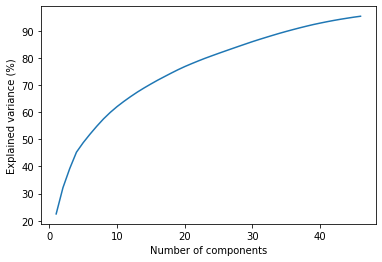

In [43]:
# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

Importance of each feature that contributes to each of the components :

In [44]:
pca_components = abs(pca.components_)
print(pca_components)

[[6.94301933e-02 8.64178744e-02 1.88059005e-01 ... 1.85044063e-01
  7.72281471e-02 1.91269033e-01]
 [1.36103390e-01 1.27938976e-01 3.59312766e-03 ... 6.37037402e-02
  1.31245264e-01 5.73163880e-02]
 [2.21291572e-01 7.27290444e-02 3.98562063e-02 ... 7.53999490e-03
  2.13938588e-01 3.62454402e-03]
 ...
 [8.60027740e-02 1.69336754e-03 1.67594258e-02 ... 2.37463044e-02
  1.30268107e-01 4.57342930e-03]
 [2.41786304e-02 1.21996141e-01 2.47810797e-02 ... 1.40616467e-02
  1.11820766e-04 4.45647539e-02]
 [1.31977347e-02 2.00074250e-02 9.04782490e-03 ... 2.25061956e-02
  4.70925146e-02 2.86479219e-02]]


In [45]:
print('Top 4 most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {df.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['MW', 'ATSp5', 'XLogP', 'ALogp2']
Component 1: ['nHBDon', 'nAtomP', 'nAtomLC', 'khs.sI']
Component 2: ['LipinskiFailures', 'fragC', 'WTPT.2', 'logS_aq_avg']
Component 3: ['MDEC.33', 'khs.aaaC', 'MDEC.23', 'Kier2']
Component 4: ['WTPT.4', 'nAtom', 'MDEN.13', 'khs.dsN']
Component 5: ['nAtom', 'khs.aasN', 'ATSm4', 'ATSm3']
Component 6: ['khs.sssB', 'nAtomLAC', 'khs.ddC', 'nB']
Component 7: ['khs.ddC', 'nB', 'khs.aaNH', 'C1SP1']
Component 8: ['khs.ssssC', 'MDEO.22', 'MDEN.11', 'khs.ddsN']
Component 9: ['khs.sOH', 'MLogP', 'PetitjeanNumber', 'MDEO.12']
Component 10: ['PetitjeanNumber', 'MLogP', 'khs.dO', 'MDEO.12']
Component 11: ['khs.aaN', 'MDEN.12', 'MDEO.22', 'MDEN.23']
Component 12: ['khs.sssN', 'khs.aaO', 'MDEC.34', 'khs.sBr']
Component 13: ['khs.dssS', 'khs.sCH3', 'khs.tsC', 'MDEO.22']
Component 14: ['MLogP', 'PetitjeanNumber', 'khs.aasN', 'khs.dssS']
Component 15: ['khs.sSH', 'khs.tN', 'C1SP1', 'khs.ssCH2']
Component 16: [

Transforming all Columns to the 46 Principal Components :


In [46]:
X_pca = pca.transform(X_scaled)
print(X_pca.shape)
print(X_pca)

(8987, 46)
[[ -5.50806969   3.50559846   0.38754455 ...  -0.26542242  -0.37641012
   -0.1523579 ]
 [ -5.70931153   3.83098967   0.31285047 ...  -0.6876524   -0.17683463
   -0.32694263]
 [ -5.4591639    1.05447557   2.6260984  ...  -0.5756411   -0.67053882
    0.05884007]
 ...
 [ 24.44876691   1.83246201   7.62631546 ...  -1.33247264  -1.47193495
   -2.26242556]
 [ 31.57234824   7.69731027  -7.52892751 ...  -0.52636965  -1.21257319
   -2.49159305]
 [ 25.05237534 -11.92726102  -7.48801963 ...  -2.57827193  -1.41294587
    0.05906081]]


Creating a Machine Learning Pipeline :

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = RandomForestRegressor(n_estimators= 1000, random_state=42)
log_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

In [48]:
# perform a split
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.3,
                     shuffle=True, 
                     random_state=42)
# train the model using the PCA components
log_regress_model.fit(X_train,y_train)

Pipeline(steps=[('std_scaler', StandardScaler()), ('pca', PCA(n_components=46)),
                ('regressor',
                 RandomForestRegressor(n_estimators=1000, random_state=42))])

In [49]:
# Make predictions on train and test data
test_pred = log_regress_model.predict(X_test)
train_pred = log_regress_model.predict(X_train)
print("Model performace after feature selection:")
# R2 score on Train set
print("Train R2:", r2_score(y_train, train_pred))

# R2 score on Test set
print("Test R2:", r2_score(y_test, test_pred))

# Train RMSE
print("Test RMSE:", sqrt(mean_squared_error(y_train, train_pred)))

# Test RMSE
print("Test RMSE:", sqrt(mean_squared_error(y_test, test_pred)))

Model performace after feature selection:
Train R2: 0.9675425059681169
Test R2: 0.7784152452564084
Test RMSE: 0.3813352251881008
Test RMSE: 0.9950570548715786


In [51]:
# save the model
import pickle
# pickle.dump(log_regress_model, open("results/pca/rf_46pca.pkl", "wb"))